In [1]:
# Importing Libraries
import pickle
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
with open("naics_occupation.pickle", 'rb') as file:
    df_naics_occupation = pd.DataFrame(pickle.load(file))

In [3]:
df_naics_occupation.head()

FIPS  State_GEOID naics  \
0  13073           13  2373   
1  13073           13  2381   
2  13073           13  2382   
3  13073           13  2383   
5  13073           13  3211   

                                         NAICS_TITLE  emp_total_county_naics  \
0           Highway, Street, and Bridge Construction                      27   
1  Foundation, Structure, and Building Exterior C...                     231   
2                     Building Equipment Contractors                     868   
3                     Building Finishing Contractors                     281   
5                     Sawmills and Wood Preservation                     116   

  OCC_CODE                       OCC_TITLE  emp_occupation  
0  11-3051  Industrial Production Managers        0.022497  
1  11-3051  Industrial Production Managers        0.067490  
2  11-3051  Industrial Production Managers        0.134981  
3  11-3051  Industrial Production Managers        0.078739  
5  11-3051  Industrial Production Managers        0.978609

In [4]:
#Checking missing values
df_naics_occupation.isna().sum()

FIPS                      0
State_GEOID               0
naics                     0
NAICS_TITLE               0
emp_total_county_naics    0
OCC_CODE                  0
OCC_TITLE                 0
emp_occupation            0
dtype: int64

In [5]:
# Number of Distinct elements
df_naics_occupation.nunique()

FIPS                        3069
State_GEOID                   51
naics                         69
NAICS_TITLE                   69
emp_total_county_naics      3833
OCC_CODE                      80
OCC_TITLE                     80
emp_occupation            385025
dtype: int64

In [6]:
# Drop NA values
df_naics_occupation.dropna(inplace=True)

# Filter for each NAICS value and create new dataframes
df_3363 = df_naics_occupation[df_naics_occupation['naics'] == '3363'][['FIPS', 'emp_occupation']]
df_3364 = df_naics_occupation[df_naics_occupation['naics'] == '3364'][['FIPS', 'emp_occupation']]
df_8113 = df_naics_occupation[df_naics_occupation['naics'] == '8113'][['FIPS', 'emp_occupation']]

# Save the dataframes to CSV files
df_3363.to_csv('naics_3363_employment_data.csv', index=False)
df_3364.to_csv('naics_3364_employment_data.csv', index=False)
df_8113.to_csv('naics_8113_employment_data.csv', index=False)

print("Dataframes saved as CSV files successfully.")

Dataframes saved as CSV files successfully.


In [7]:
with open("naics_pattern.pickle", 'rb') as file:
    df_naics_pattern = pd.DataFrame(pickle.load(file))

In [8]:
df_naics_pattern.head()

State_GEOID County_GEOID  FIPS naics_2 naics  \
0          01          001  1001      11  1133   
1          01          001  1001      21  2123   
2          01          001  1001      22  2211   
4          01          001  1001      23  2362   
5          01          001  1001      23  2371   

                                         DESCRIPTION emp_nf  emp qp1_nf   qp1  \
0                                            Logging      G   68      G  1213   
1           Nonmetallic Mineral Mining and Quarrying      G   87      G  1224   
2  Electric Power Generation, Transmission and Di...      G  129      G  4418   
4               Nonresidential Building Construction      H   69      H   685   
5                        Utility System Construction      H   65      H  1117   

   ... n20_49  n50_99  n100_249 n250_499 n500_999 n1000 n1000_1 n1000_2  \
0  ...      N       N         N        N        N     N       N       N   
1  ...      N       N         N        N        N     N       N       N   
2  ...      N       N         N        N        N     N       N       N   
4  ...      N       N         N        N        N     N       N       N   
5  ...      N       N         N        N        N     N       N       N   

  n1000_3 n1000_4  
0       N       N  
1       N       N  
2       N       N  
4       N       N  
5       N       N  

[5 rows x 26 columns]

In [9]:
# Checking missing values
df_naics_pattern.isna().sum()

State_GEOID     0
County_GEOID    0
FIPS            0
naics_2         0
naics           0
DESCRIPTION     0
emp_nf          0
emp             0
qp1_nf          0
qp1             0
ap_nf           0
ap              0
est             0
n<5             0
n5_9            0
n10_19          0
n20_49          0
n50_99          0
n100_249        0
n250_499        0
n500_999        0
n1000           0
n1000_1         0
n1000_2         0
n1000_3         0
n1000_4         0
dtype: int64

In [10]:
# Number of Distinct elements
df_naics_pattern.nunique()

State_GEOID        51
County_GEOID      318
FIPS             3071
naics_2            15
naics              69
DESCRIPTION        69
emp_nf              3
emp              3812
qp1_nf              3
qp1             13960
ap_nf               3
ap              25504
est               766
n<5               563
n5_9              232
n10_19            177
n20_49            132
n50_99             72
n100_249           57
n250_499           32
n500_999           23
n1000              27
n1000_1            14
n1000_2            12
n1000_3            12
n1000_4             8
dtype: int64

In [11]:
# Drop NA values
df_naics_pattern.dropna(inplace=True)

# Filter for each NAICS value and create new dataframes
df_pattern_3363 = df_naics_pattern[df_naics_pattern['naics'] == '3363'][['FIPS', 'est', 'qp1','naics_2']]
df_pattern_3364 = df_naics_pattern[df_naics_pattern['naics'] == '3364'][['FIPS', 'est', 'qp1','naics_2']]
df_pattern_8113 = df_naics_pattern[df_naics_pattern['naics'] == '8113'][['FIPS', 'est', 'qp1','naics_2']]

# Save the dataframes to CSV files
df_pattern_3363.to_csv('naics_pattern_3363.csv', index=False)
df_pattern_3364.to_csv('naics_pattern_3364.csv', index=False)
df_pattern_8113.to_csv('naics_pattern_8113.csv', index=False)

print("Pattern dataframes saved as CSV files successfully.")

Pattern dataframes saved as CSV files successfully.


In [12]:
with open("gdp.pickle", 'rb') as file:
    df_gdp = pd.DataFrame(pickle.load(file))

In [13]:
df_gdp.head()

FIPS        GeoName Region TableName  LineCode IndustryClassification  \
0     0  United States           CAGDP9         1                    ...   
1     0  United States           CAGDP9         2                    ...   
2     0  United States           CAGDP9         3                     11   
3     0  United States           CAGDP9         6                     21   
4     0  United States           CAGDP9        10                     22   

                                        Description  \
0                               All industry total    
1                               Private industries    
2       Agriculture, forestry, fishing and hunting    
3    Mining, quarrying, and oil and gas extraction    
4                                        Utilities    

                                Unit          2017          2018  \
0  Thousands of chained 2017 dollars  1.961210e+10  2.019390e+10   
1  Thousands of chained 2017 dollars  1.715626e+10  1.771178e+10   
2  Thousands of chained 2017 dollars  1.768400e+08  1.841050e+08   
3  Thousands of chained 2017 dollars  2.673020e+08  2.770130e+08   
4  Thousands of chained 2017 dollars  3.137110e+08  3.092690e+08   

           2019          2020          2021          2022  
0  2.069209e+10  2.023407e+10  2.140769e+10  2.182204e+10  
1  1.819575e+10  1.776187e+10  1.890945e+10  1.928312e+10  
2  1.711490e+08  1.736590e+08  1.837420e+08  1.700580e+08  
3  3.146040e+08  3.055880e+08  2.694780e+08  2.452900e+08  
4  3.129200e+08  3.323360e+08  3.166030e+08  3.183920e+08

In [14]:
# Checking missing values
df_gdp.isna().sum()

FIPS                          0
GeoName                       0
Region                        0
TableName                     0
LineCode                      0
IndustryClassification        0
Description                   0
Unit                          0
2017                      18106
2018                      18041
2019                      18321
2020                      18111
2021                      17921
2022                      17949
dtype: int64

In [15]:
df_gdp.nunique()

FIPS                       3178
GeoName                    3178
Region                        9
TableName                     1
LineCode                     34
IndustryClassification       31
Description                  34
Unit                          1
2017                      71929
2018                      72088
2019                      72081
2020                      72032
2021                      73009
2022                      72769
dtype: int64

In [16]:
# Drop NA values
df_gdp.dropna(inplace=True)

# Define the IndustryClassification values to filter
industry_classifications = ['31-33', '81']
additional_classification_pattern = '31-33,'

# Function to check if a classification is valid
def is_valid_classification(classification):
    if classification in industry_classifications:
        return True
    if classification.startswith(additional_classification_pattern):
        return True
    return False

# Apply the filter
filtered_gdp_df = df_gdp[df_gdp['IndustryClassification'].apply(is_valid_classification)]

# Select the required columns
filtered_gdp_df = filtered_gdp_df[['FIPS', 'IndustryClassification', '2017', '2018', '2019', '2020', '2021', '2022']]

# Save the filtered dataframe to a CSV file
filtered_gdp_df.to_csv('filtered_gdp_data.csv', index=False)

print("Filtered GDP data saved as CSV file successfully.")

Filtered GDP data saved as CSV file successfully.


In [17]:
df_naics_3363 = pd.read_csv('naics_3363_employment_data.csv').dropna()
df_naics_3364 = pd.read_csv('naics_3364_employment_data.csv').dropna()
df_naics_8113 = pd.read_csv('naics_8113_employment_data.csv').dropna()
df_pattern_3363 = pd.read_csv('naics_pattern_3363.csv').dropna()
df_pattern_3364 = pd.read_csv('naics_pattern_3364.csv').dropna()
df_pattern_8113 = pd.read_csv('naics_pattern_8113.csv').dropna()
df_gdp = pd.read_csv('filtered_gdp_data.csv').dropna()

# Map for IndustryClassification to naics_2 equivalence
industry_to_naics = {'31-33': '33', '31-33,51': '33', '81': '81'}

# Apply the mapping to the GDP data
df_gdp['naics_2'] = df_gdp['IndustryClassification'].map(industry_to_naics)

# Initialize the merged DataFrame
merged_df = pd.DataFrame()
merged_df['FIPS'] = df_gdp['FIPS']

# Merge employment data
merged_df = merged_df.merge(df_naics_3363[['FIPS', 'emp_occupation']], on='FIPS', how='left')
merged_df = merged_df.rename(columns={'emp_occupation': 'emp_occupation_3363'})
merged_df = merged_df.merge(df_naics_3364[['FIPS', 'emp_occupation']], on='FIPS', how='left')
merged_df = merged_df.rename(columns={'emp_occupation': 'emp_occupation_3364'})
merged_df = merged_df.merge(df_naics_8113[['FIPS', 'emp_occupation']], on='FIPS', how='left')
merged_df = merged_df.rename(columns={'emp_occupation': 'emp_occupation_8113'})

# Merge pattern data
merged_df = merged_df.merge(df_pattern_3363[['FIPS', 'est', 'qp1']], on='FIPS', how='left')
merged_df = merged_df.rename(columns={'est': 'est_3363', 'qp1': 'qp1_3363'})
merged_df = merged_df.merge(df_pattern_3364[['FIPS', 'est', 'qp1']], on='FIPS', how='left')
merged_df = merged_df.rename(columns={'est': 'est_3364', 'qp1': 'qp1_3364'})
merged_df = merged_df.merge(df_pattern_8113[['FIPS', 'est', 'qp1']], on='FIPS', how='left')
merged_df = merged_df.rename(columns={'est': 'est_8113', 'qp1': 'qp1_8113'})
merged_df = merged_df.dropna().drop_duplicates()
# Merge GDP data
merged_df = merged_df.merge(df_gdp[['FIPS', 'IndustryClassification','2017','2018','2019','2020','2021','2022']], on='FIPS', how='left')
merged_df = merged_df.dropna().drop_duplicates(subset=['FIPS'])
# Save the merged dataframe to a CSV file
merged_df.to_csv('merged_data.csv', index=False)

print("Merged data saved as CSV file successfully.")

Merged data saved as CSV file successfully.


In [18]:
merged_df

FIPS  emp_occupation_3363  emp_occupation_3364  \
0          1073            47.371960             0.439593   
159588     1089            40.222785            45.173993   
331452     4013            31.914153           186.201045   
481212     4015             0.987951             0.555029   
619740     4019             1.243264           141.110509   
...         ...                  ...                  ...   
18177388  53057             2.035555             4.996363   
18326095  53061             3.341794           617.339309   
18474802  53063             3.396221             5.235840   
18623509  55079            20.777537             1.563458   
18814777  55133            12.370520             4.292653   

          emp_occupation_8113  est_3363  qp1_3363  est_3364   qp1_3364  \
0                    2.001306      10.0   39162.0       3.0      362.0   
159588               0.115682       7.0   41428.0      12.0    35551.0   
331452               5.949908      50.0   23989.0      54.0   255834.0   
481212               0.177609       3.0     421.0       3.0      369.0   
619740               0.444023       9.0     956.0      10.0   376035.0   
...                       ...       ...       ...       ...        ...   
18177388             0.108853       3.0    1505.0       4.0     6409.0   
18326095             0.337445       5.0    1993.0      32.0  1016181.0   
18474802             0.544266       5.0    3628.0       6.0     5177.0   
18623509             1.138307      13.0   16538.0       3.0     1511.0   
18814777             1.110878      19.0    8087.0       5.0     3432.0   

          est_8113  qp1_8113 IndustryClassification        2017        2018  \
0             58.0   16243.0                  31-33   3093525.0   3132506.0   
159588        10.0     434.0                  31-33   3480854.0   3758949.0   
331452       225.0   40158.0                  31-33  17323152.0  19278751.0   
481212        18.0     774.0                  31-33    316375.0    350195.0   
619740        41.0    3484.0                  31-33   5183931.0   5684329.0   
...            ...       ...                    ...         ...         ...   
18177388      11.0     976.0                  31-33   1529615.0   1349144.0   
18326095      40.0    2044.0                  31-33  19262048.0  19457580.0   
18474802      38.0    3503.0                  31-33   1732233.0   1858860.0   
18623509      33.0    7216.0                  31-33   6974407.0   6910073.0   
18814777      52.0    7562.0                  31-33   5544221.0   5540462.0   

                2019        2020        2021        2022  
0          3047927.0   3044358.0   2915835.0   3184969.0  
159588     3743105.0   3309889.0   3440631.0   3849978.0  
331452    20691713.0  21326882.0  23753533.0  24204717.0  
481212      384900.0    376309.0    420692.0    383945.0  
619740     6650823.0   6570749.0   7044256.0   7379840.0  
...              ...         ...         ...         ...  
18177388   1286330.0   1643007.0   1377572.0   1176716.0  
18326095  19417741.0  12865806.0  12568281.0  13236082.0  
18474802   1941064.0   1920916.0   1872860.0   1811025.0  
18623509   6944865.0   6544800.0   6986166.0   6636383.0  
18814777   5596733.0   5138120.0   5648853.0   5280899.0  

[113 rows x 17 columns]

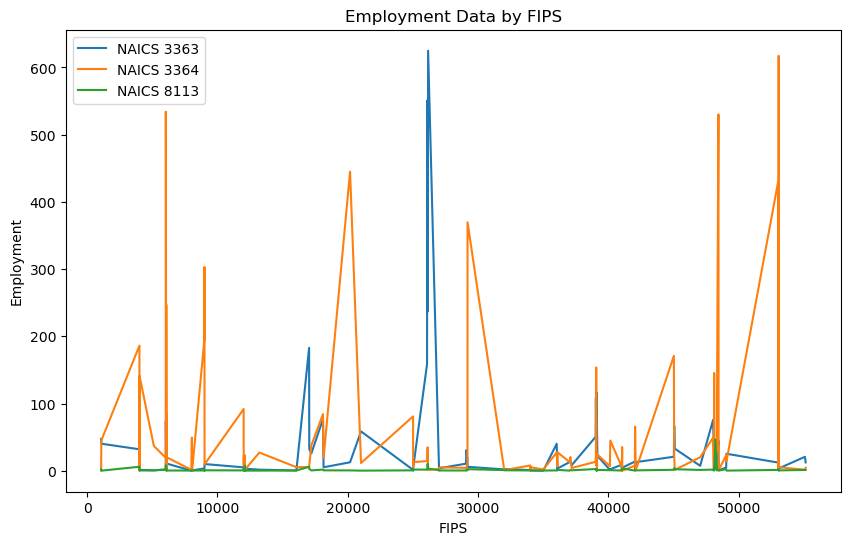

In [19]:
# Plot Employment Data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['FIPS'], merged_df['emp_occupation_3363'], label='NAICS 3363')
plt.plot(merged_df['FIPS'], merged_df['emp_occupation_3364'], label='NAICS 3364')
plt.plot(merged_df['FIPS'], merged_df['emp_occupation_8113'], label='NAICS 8113')
plt.xlabel('FIPS')
plt.ylabel('Employment')
plt.title('Employment Data by FIPS')
plt.legend()
plt.show()

C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

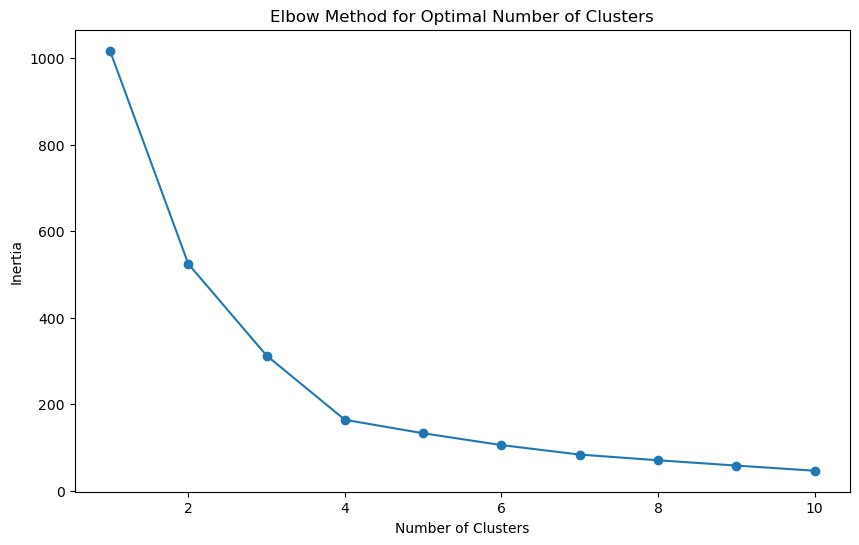

In [20]:
features = merged_df[['emp_occupation_3363',
                      'est_3363', 'qp1_3363',
                      '2017', '2018', '2019', '2020', '2021', '2022']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering completed and saved as 'clustered_data.csv'


C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

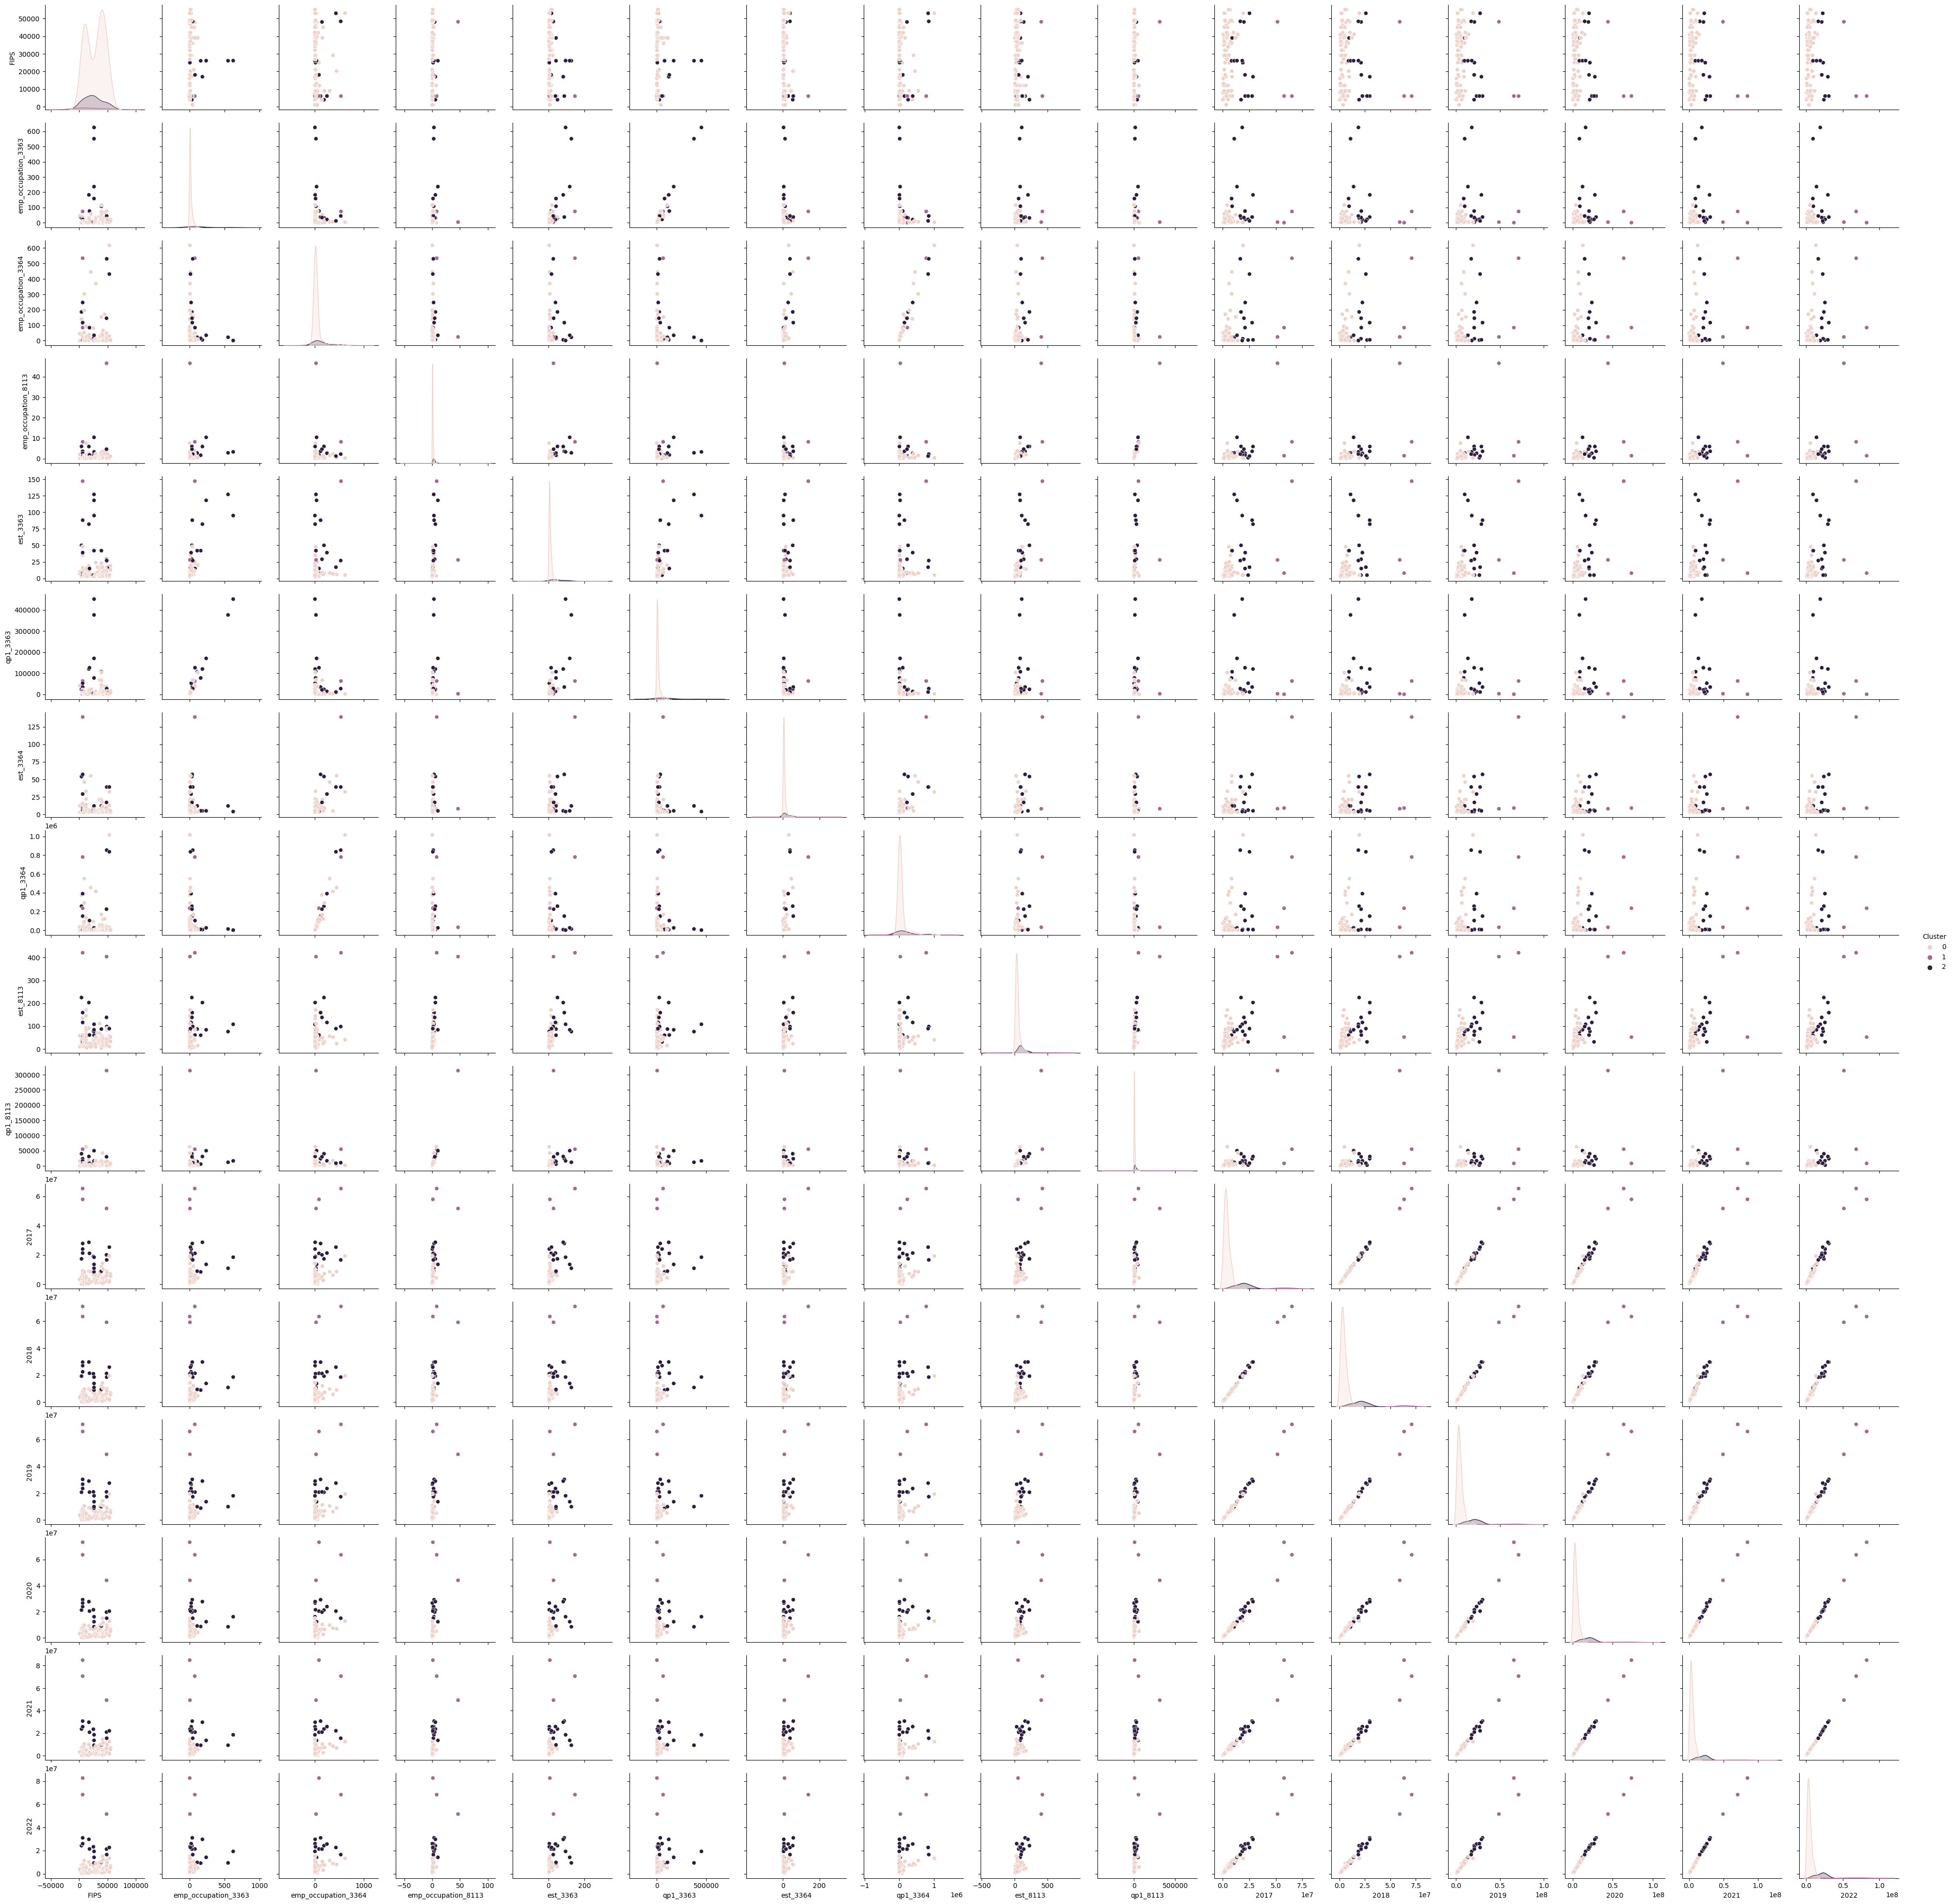

In [21]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
merged_df['Cluster'] = clusters

# Save the clustered data to a CSV file
merged_df.to_csv('clustered_data3363.csv', index=False)

print("Clustering completed and saved as 'clustered_data.csv'")

# Visualize the clusters using a pairplot
sns.pairplot(merged_df, hue='Cluster', diag_kind='kde')
plt.show()

C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

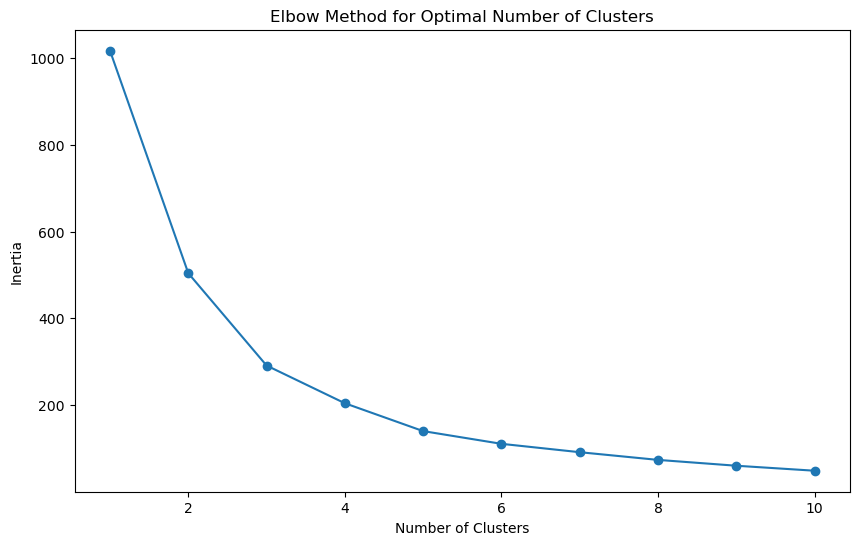

In [22]:
features = merged_df[[ 'emp_occupation_3364',
                       'est_3364','qp1_3364',
                      '2017', '2018', '2019', '2020', '2021', '2022']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering completed and saved as 'clustered_data.csv'


C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

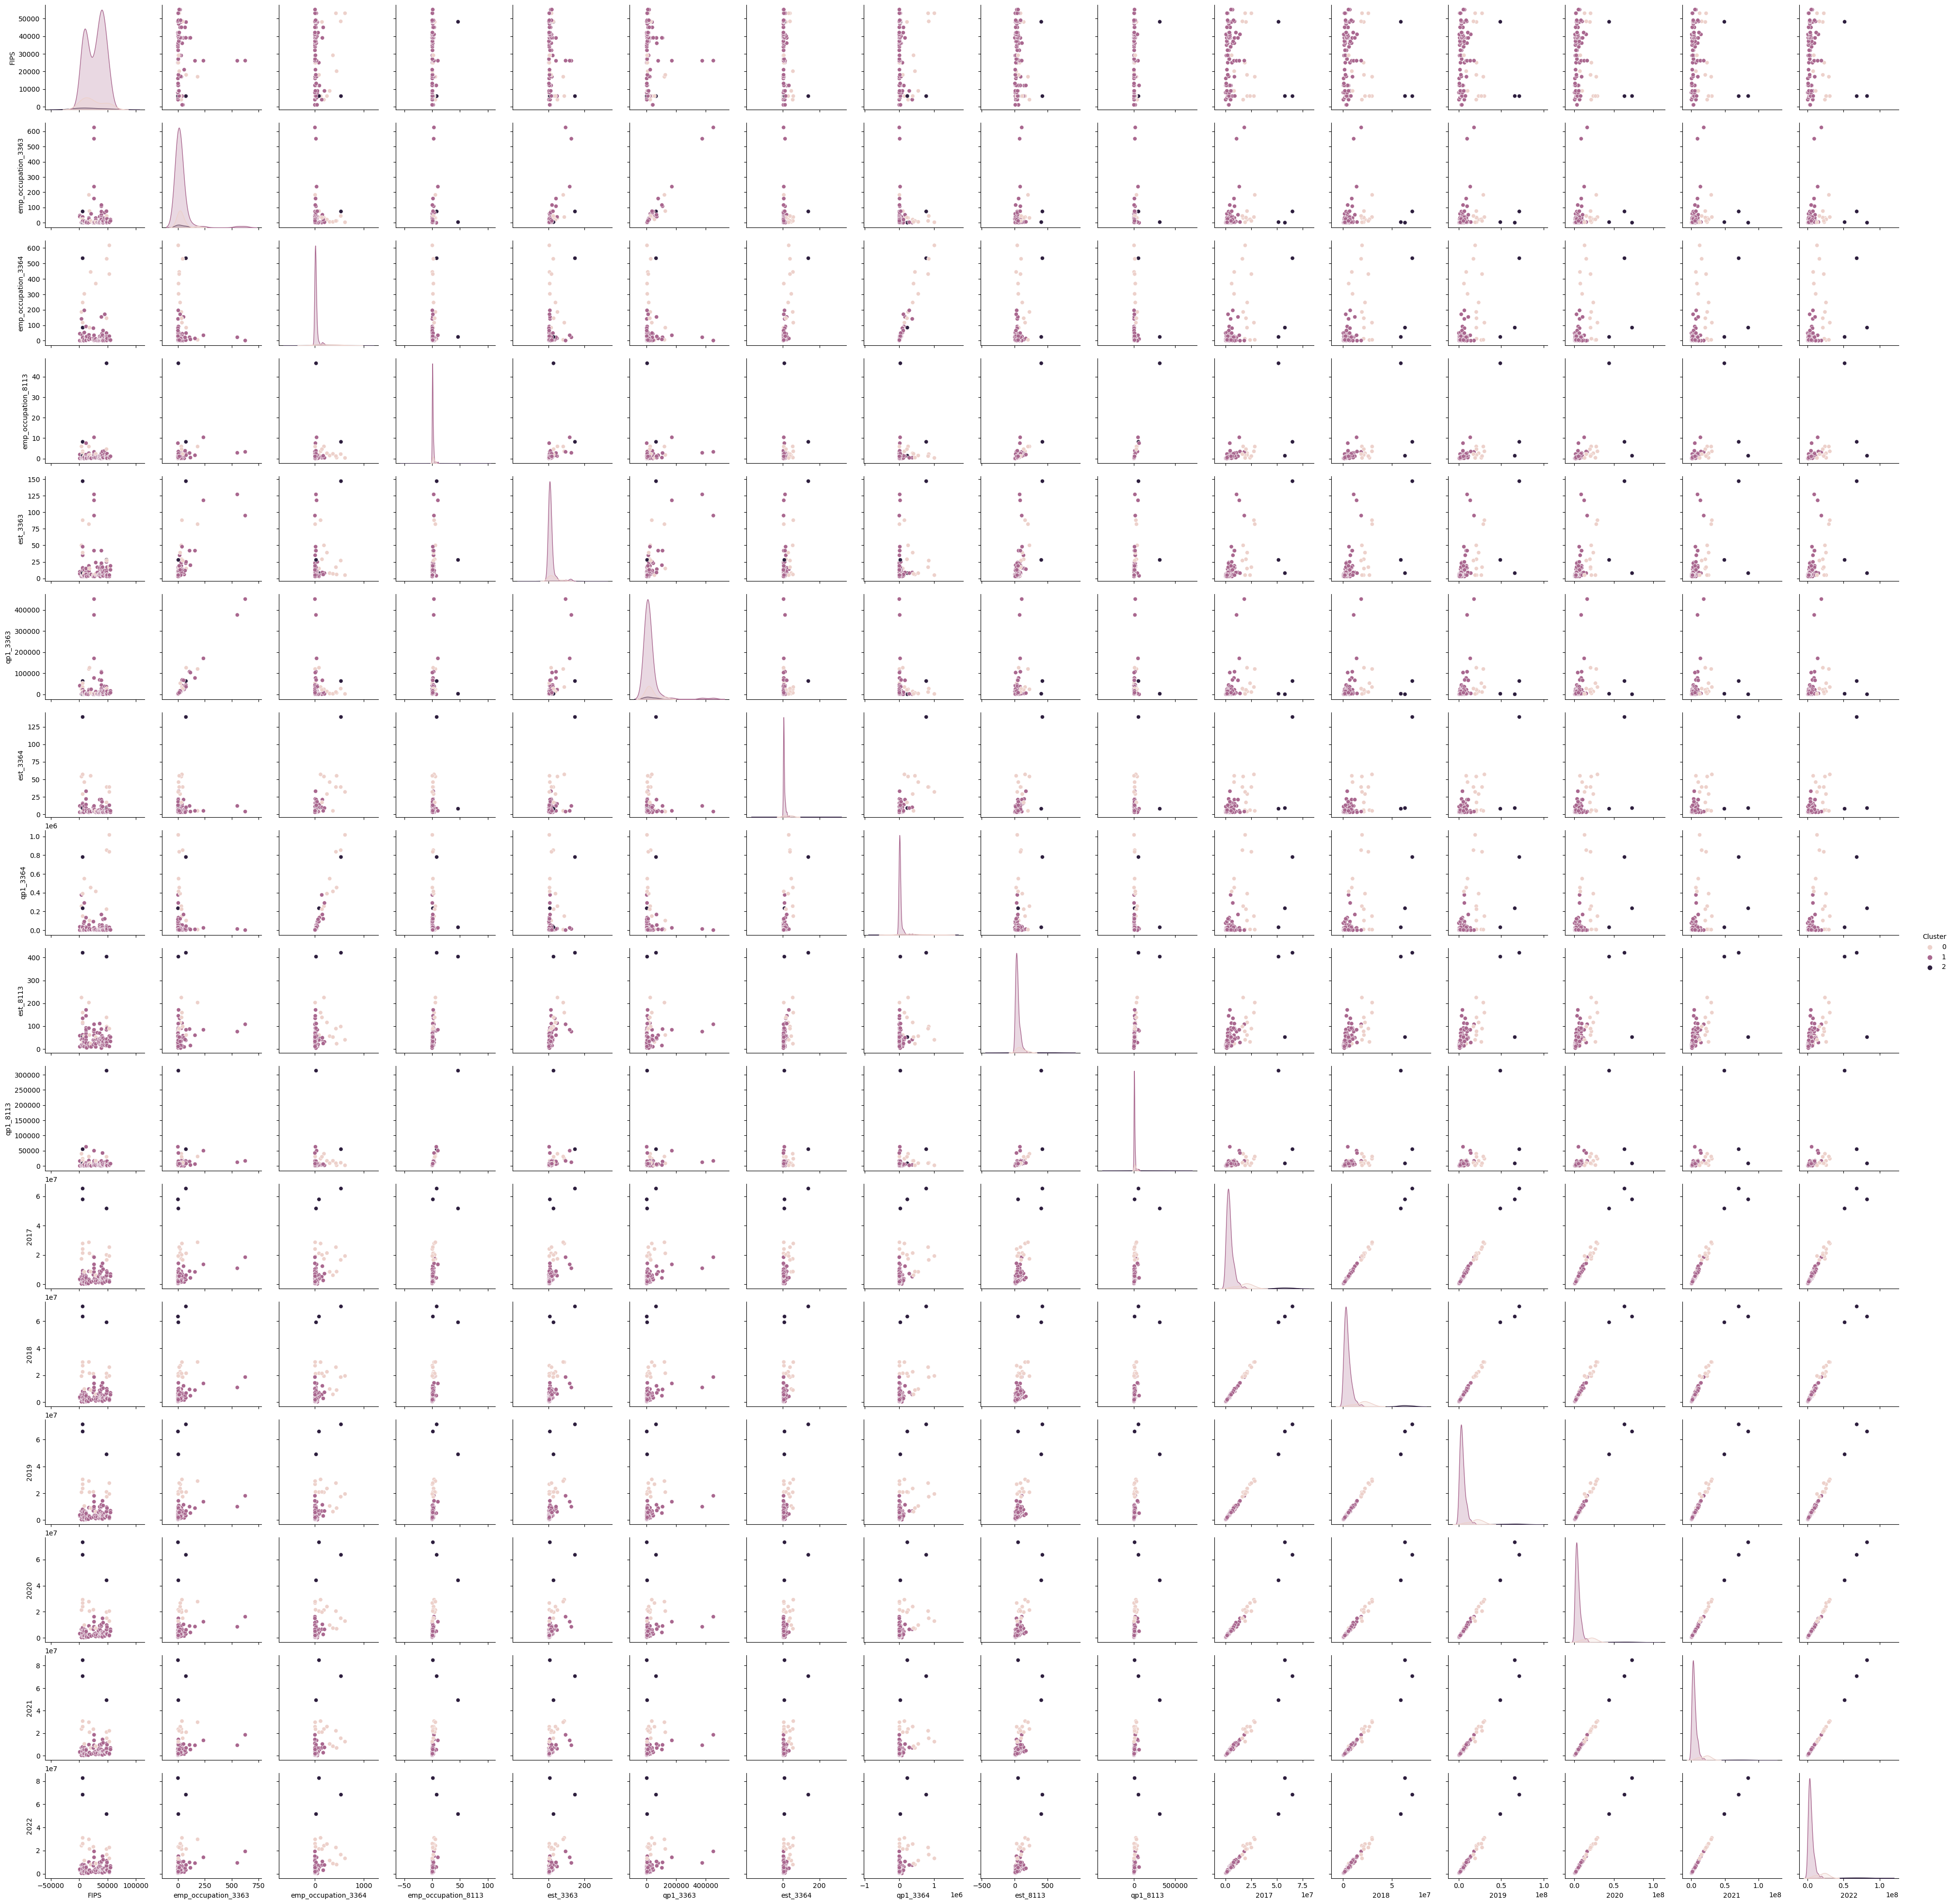

In [23]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
merged_df['Cluster'] = clusters

# Save the clustered data to a CSV file
merged_df.to_csv('clustered_data3364.csv', index=False)

print("Clustering completed and saved as 'clustered_data.csv'")

# Visualize the clusters using a pairplot
sns.pairplot(merged_df, hue='Cluster', diag_kind='kde')
plt.show()

C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


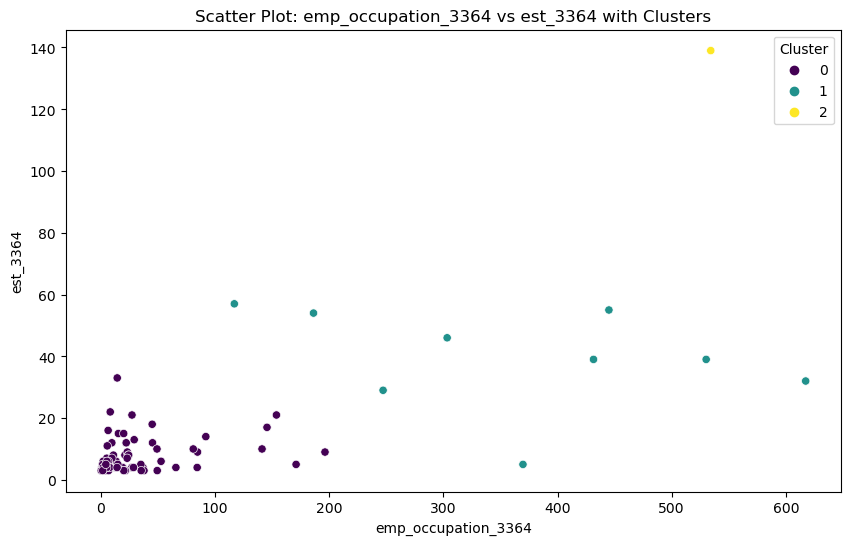

In [24]:
data_3363 = pd.read_csv('clustered_data3364.csv')
selected_columns = ['emp_occupation_3364', 'est_3364']
selected_data = data_3363[selected_columns].dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform KMeans clustering
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
selected_data['Cluster'] = clusters

# Plot the data with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='emp_occupation_3364', y='est_3364', hue='Cluster', data=selected_data, palette='viridis')
plt.title('Scatter Plot: emp_occupation_3364 vs est_3364 with Clusters')
plt.show()

C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

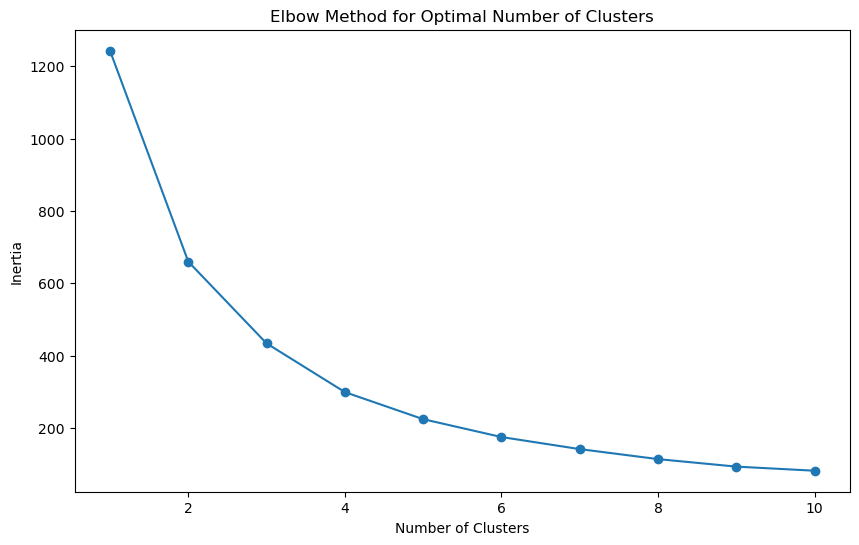

In [25]:
features = merged_df[[ 'emp_occupation_8113',
                      'est_8113', 'qp1_3363', 'qp1_3364', 'qp1_8113',
                      '2017', '2018', '2019', '2020', '2021', '2022']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering completed and saved as 'clustered_data.csv'


C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\b_sen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

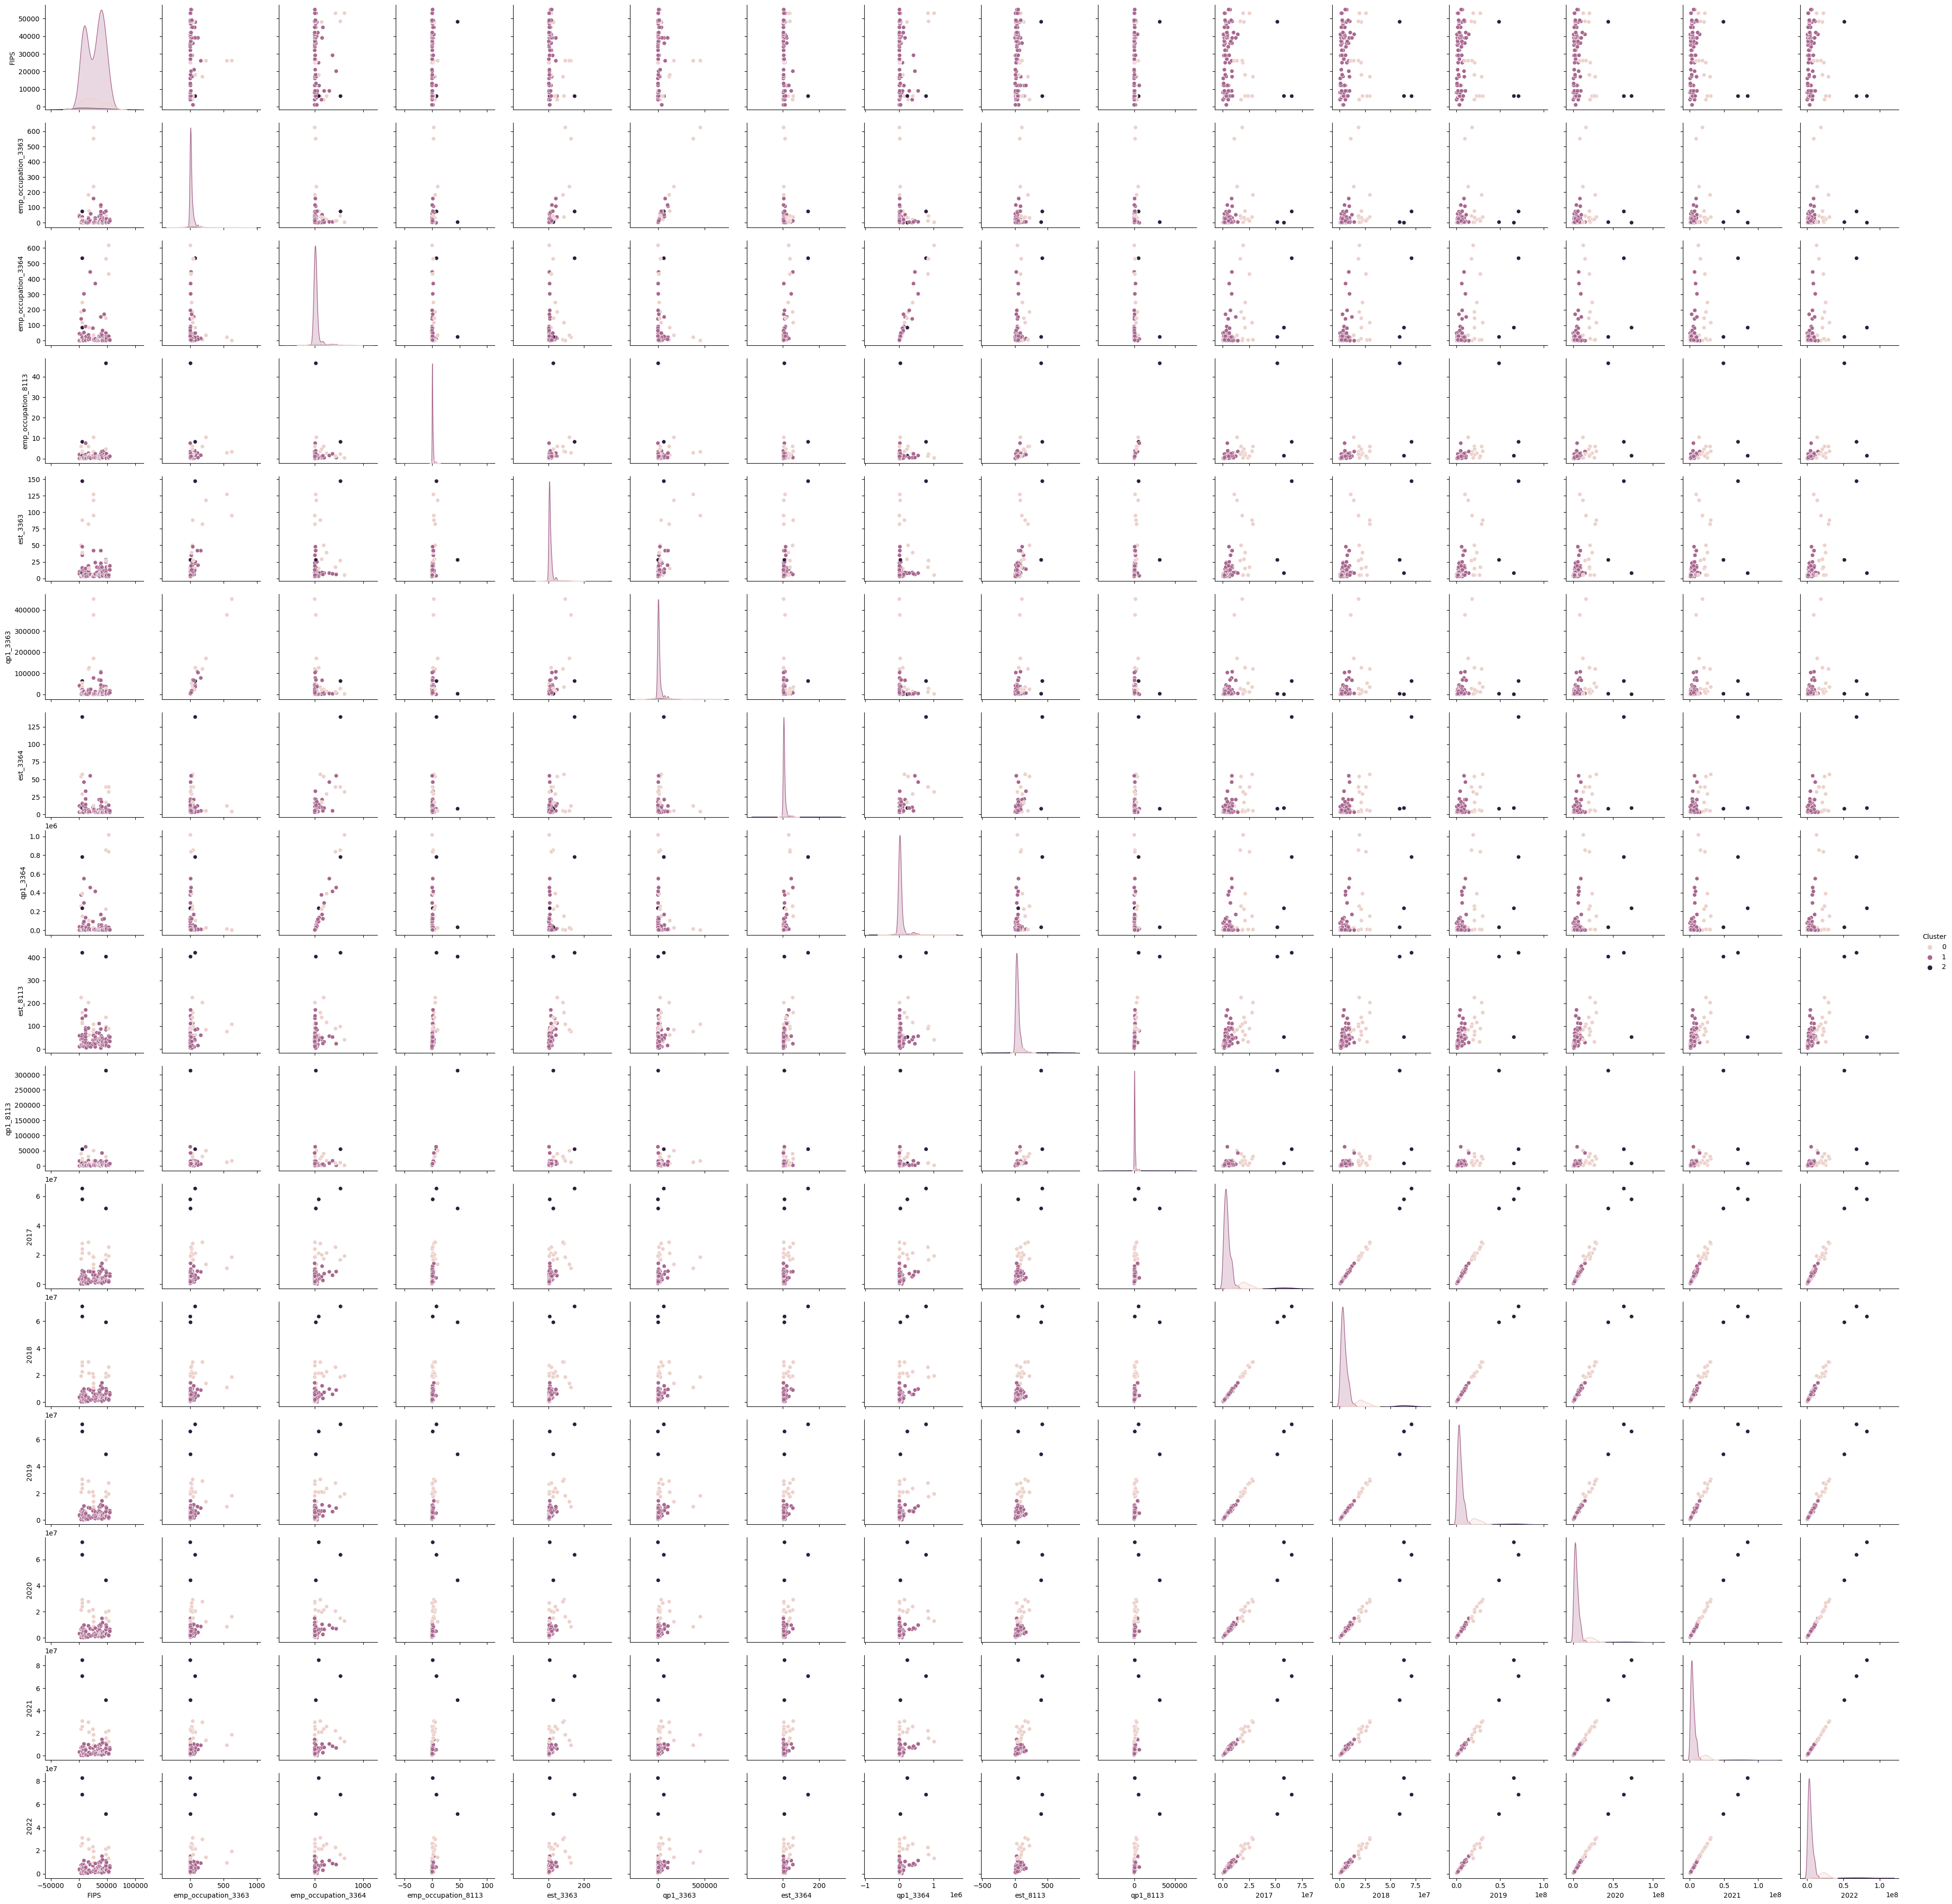

In [26]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
merged_df['Cluster'] = clusters

# Save the clustered data to a CSV file
merged_df.to_csv('clustered_data8113.csv', index=False)

print("Clustering completed and saved as 'clustered_data.csv'")

# Visualize the clusters using a pairplot
sns.pairplot(merged_df, hue='Cluster', diag_kind='kde')
plt.show()

C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


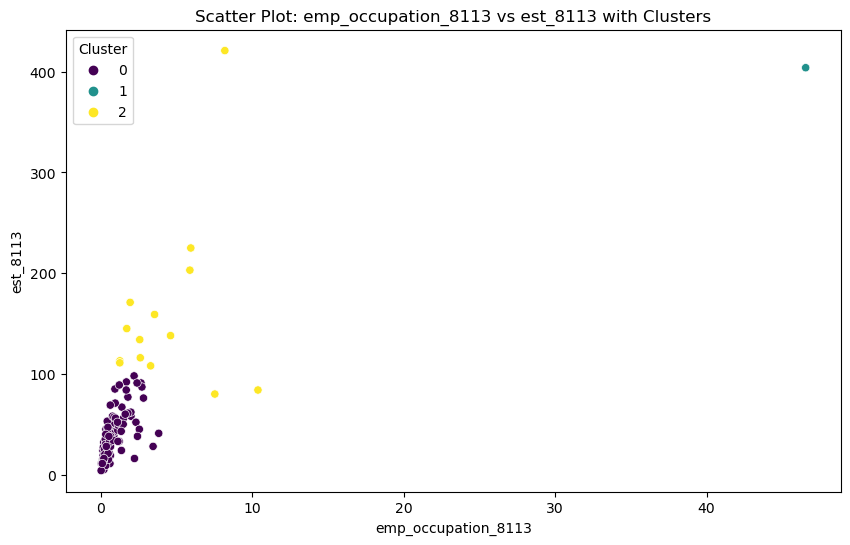

In [27]:
data_3363 = pd.read_csv('clustered_data8113.csv')
selected_columns = ['emp_occupation_8113', 'est_8113']
selected_data = data_3363[selected_columns].dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform KMeans clustering
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
selected_data['Cluster'] = clusters

# Plot the data with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='emp_occupation_8113', y='est_8113', hue='Cluster', data=selected_data, palette='viridis')
plt.title('Scatter Plot: emp_occupation_8113 vs est_8113 with Clusters')
plt.show()

C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\b_sen\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


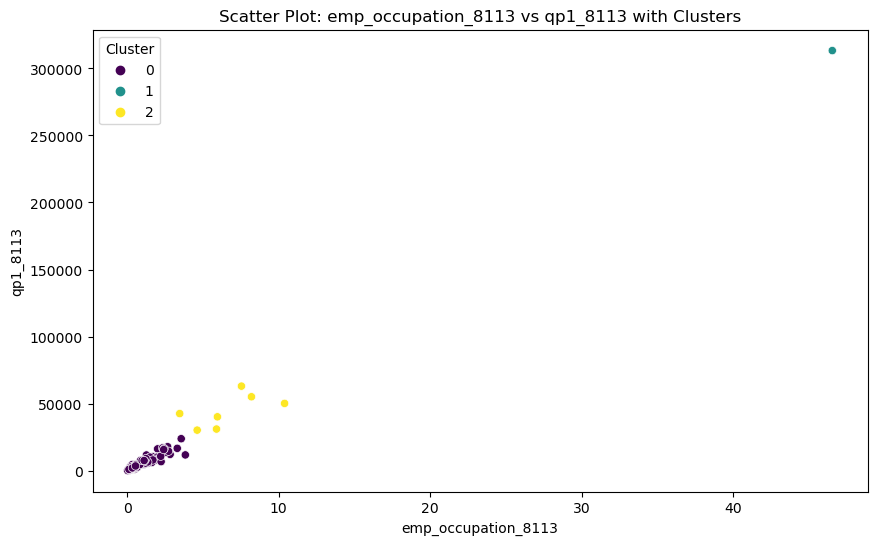

In [28]:
data_3363 = pd.read_csv('clustered_data8113.csv')
selected_columns = ['emp_occupation_8113', 'qp1_8113']
selected_data = data_3363[selected_columns].dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform KMeans clustering
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
selected_data['Cluster'] = clusters

# Plot the data with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='emp_occupation_8113', y='qp1_8113', hue='Cluster', data=selected_data, palette='viridis')
plt.title('Scatter Plot: emp_occupation_8113 vs qp1_8113 with Clusters')
plt.show()